# Flight Price Prediction

### Tasks which we are doing today
* introduction
* About the Flight Fare Prediction Dataset
* Importing Libraries
* Reading the training data of out dataset
* Explaoratory data analysis
* Data visualization of Flight Price Prediction using ML
* Feature Engineering
* Correlation Between  all Features
* Model Building
  -- Ridge Regression
  -- Lasoo Regression
  -- Decision Tree Regression


### About the Flight Fare Predection Dataset

* Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
* Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
* Source: This column holds the name of the place from where the passenger’s journey will start.
* Destination: This column holds the name of the place to where passengers wanted to travel.
* Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
* Arrival_Time: Arrival time is when the passenger will reach his/her destination.
* Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
* Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
* Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
* Price: Price of the flight for a complete journey including all the expenses before onboarding.

### Importing Libraries


In [99]:
#Basic Libraries
import pandas as pd
import numpy as np
#Visulaization
import seaborn as sns
import matplotlib.pyplot as plt
#PreProcessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#Model building
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluation
from sklearn.metrics import mean_squared_error   as mse
from sklearn.metrics import r2_score

#saving 
import joblib

### Reading the dataset

In [2]:
#Laod the datset
data=pd.read_excel("Flight_Fare.xlsx")

In [3]:
#top  records 
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### EDA (Exploratory Data Analysis)

In [4]:
#different columns in the dataset
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
#information on put dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Observation: 
* There are 10683  flight  records 
* There are 11 columns 
* Here the Target variable is Price
* the "Price" is interger datatype
* the 'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info' are in Obect datatype

In [6]:
#to get Statistical description on the data
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
#check for the null values in the dataset
data.isnull().head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#check for the sum of null values  in the dataset
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Null values in the Route column
data[pd.isnull(data["Route"])]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
#Null values in the Total_Stops
data[pd.isnull(data["Total_Stops"])]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
#Drop the NAN values  in the dataset
data.dropna(inplace=True)

In [12]:
#Check for the null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
#check for the Duplicated values
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


Observation: we need to remove the repeated values from the dataset and keeping in place attribute so there will be no changes 

In [14]:
# Total Number of duplicated values in the dataset
len(data[data.duplicated()])

220

In [15]:
data.shape

(10682, 11)

In [16]:
#Drop the Duplicated reocrds of the dataset
data.drop_duplicates(keep="first",inplace=True)

In [17]:
#shape of the dataset
data.shape

(10462, 11)

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Checking  columns

##### Checking Additional_Info column

In [19]:
#Additional_Info
#checking the Additional_Info colum and having the count  of unique types of values
data["Additional_Info"].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

#####  checking the Airline column


In [20]:
#Airline
#checking the different Airline
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

#### Checking the Airline Routes

In [21]:
data["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

### Data Visulalization of flight Price Predection Using Machine Learning

#### Plotting Price Vs Airline Plot

C:\Users\Niki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


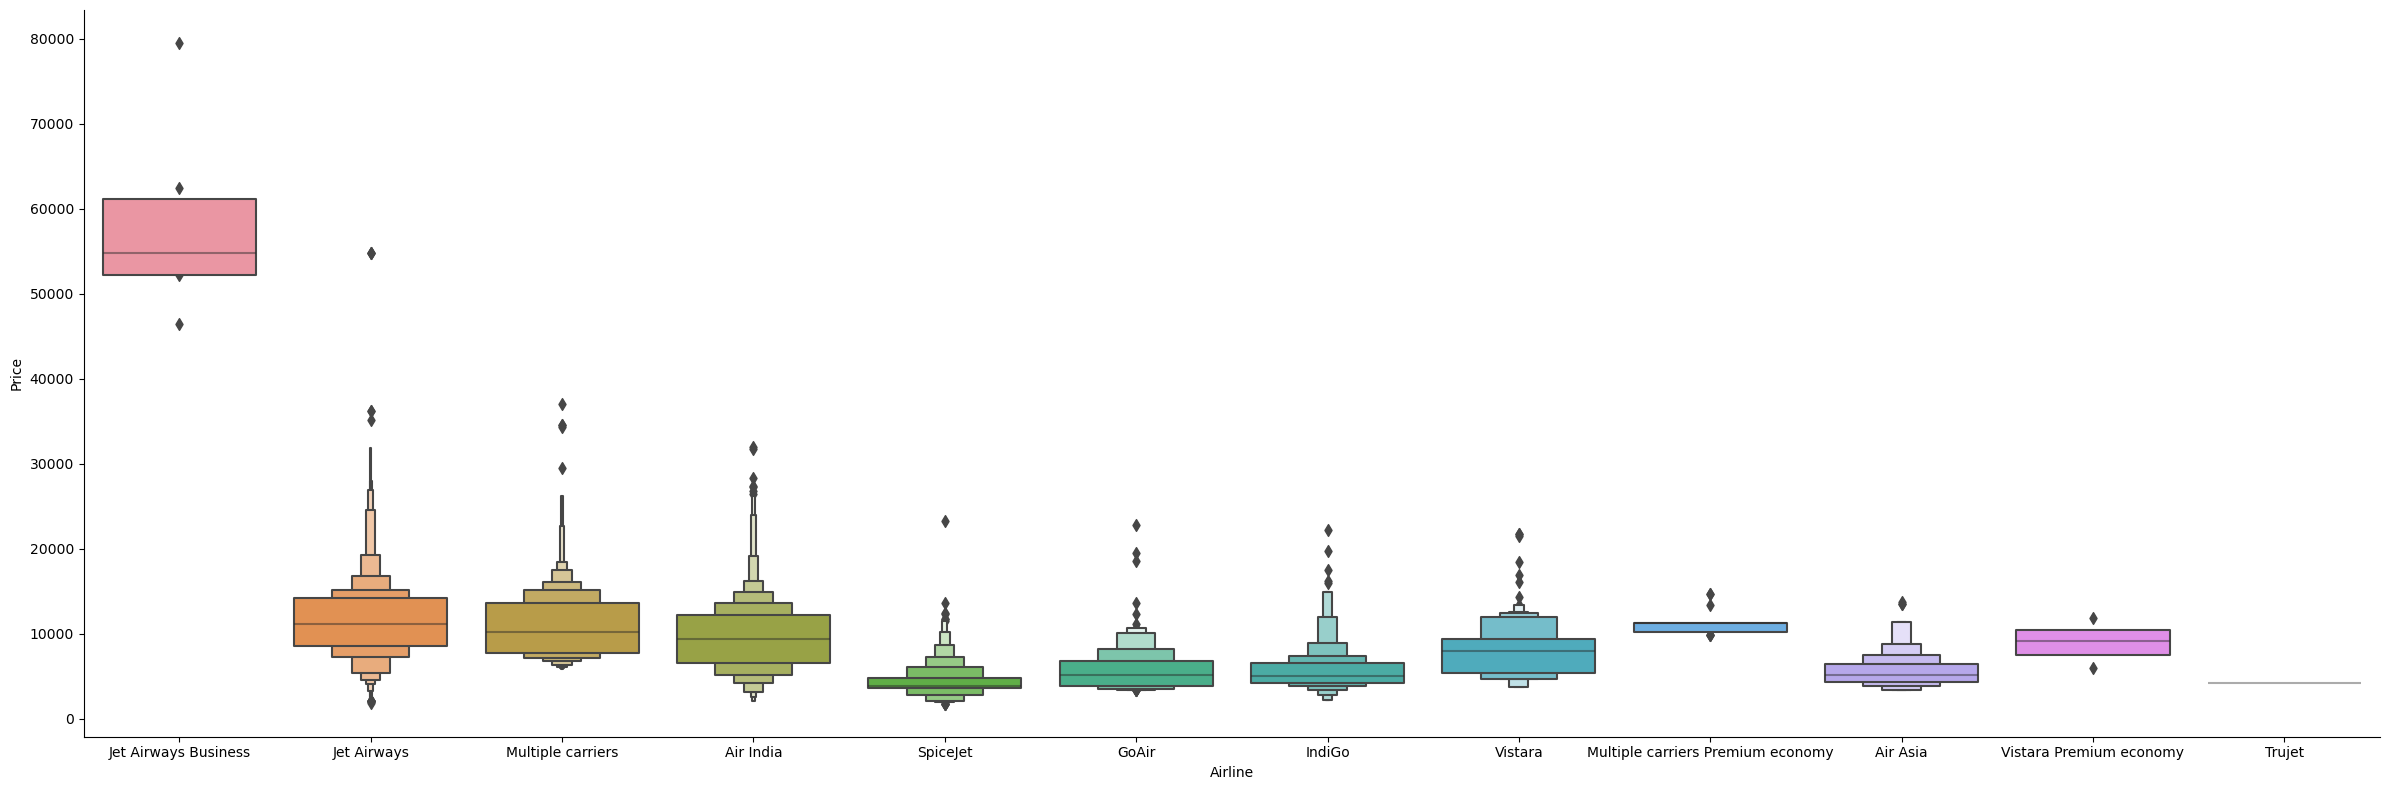

In [22]:
sns.catplot(y="Price",x="Airline",data=data.sort_values("Price",ascending=False),kind="boxen",height=8,aspect=3)

Observation: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and the airline and we can conclude that Jet Airways has the most outliers in terms of price

#### Plotting  Voilin plot  for Price vs Source

C:\Users\Niki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


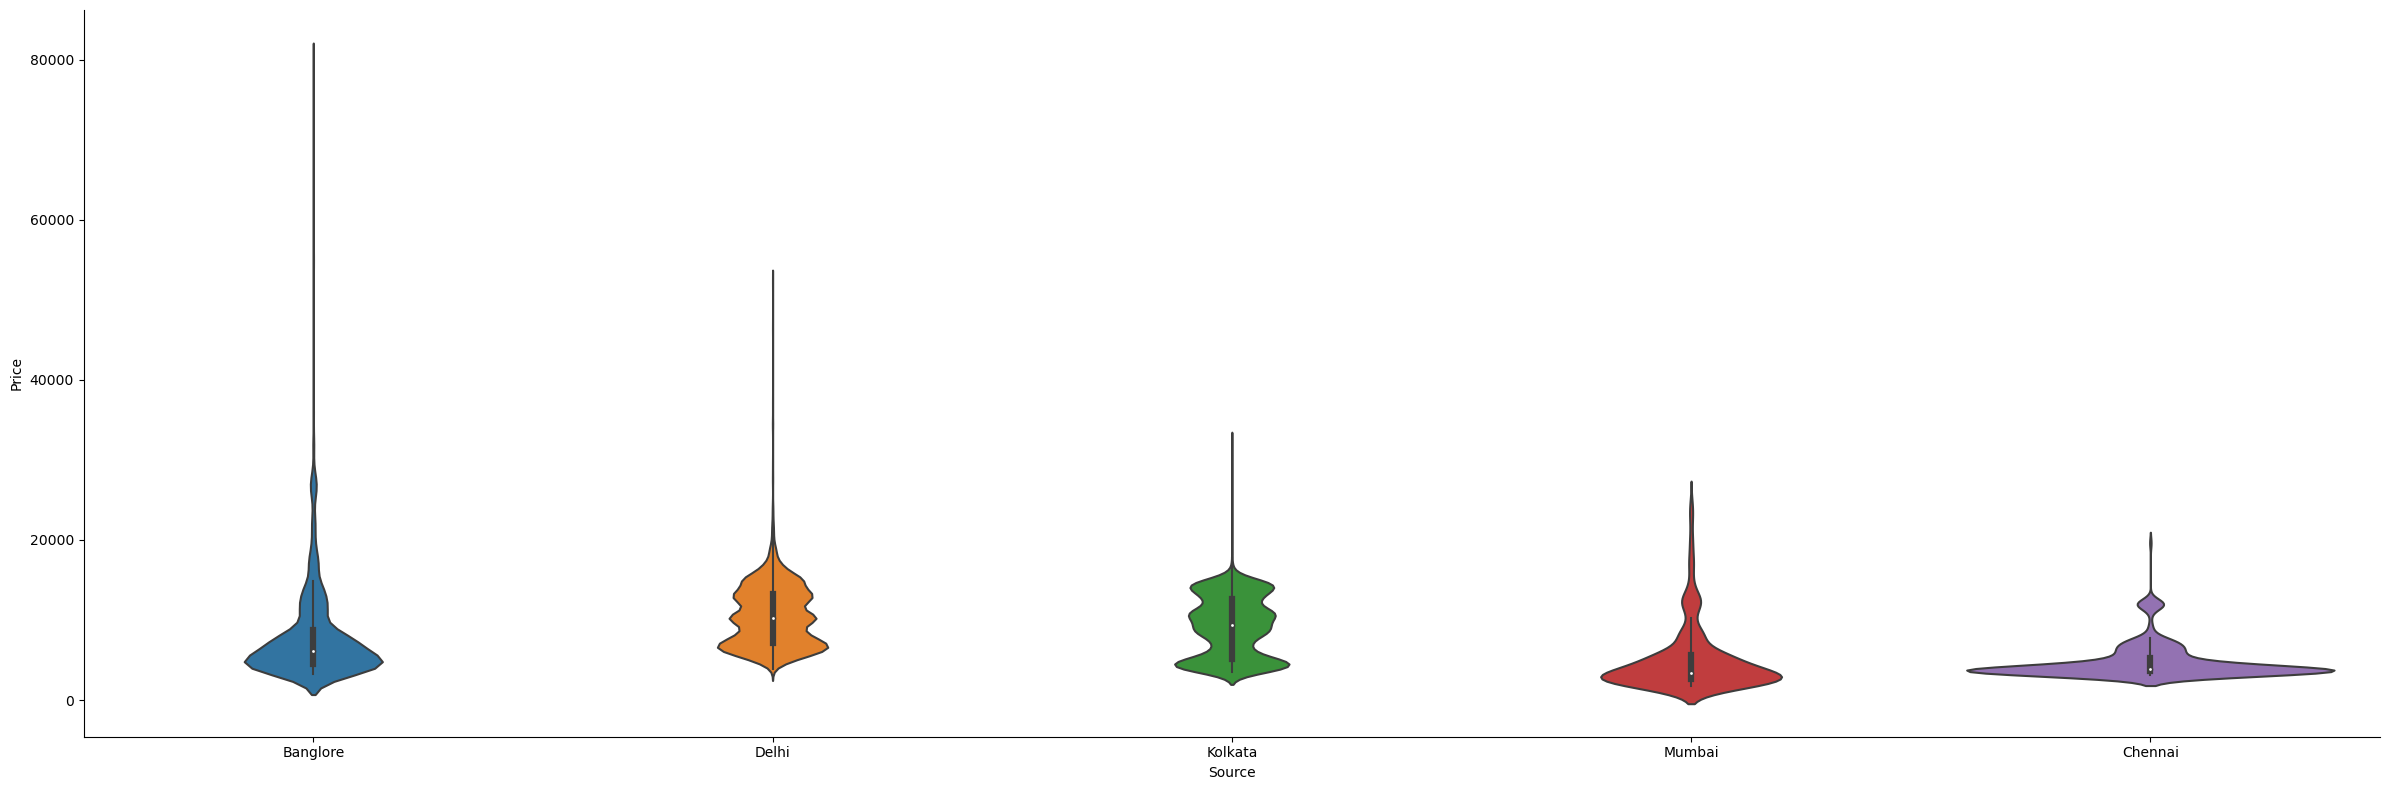

In [23]:
sns.catplot(y="Price",x="Source",data=data.sort_values("Price",ascending=False),kind="violin",height=8,aspect=3)

Objective: Now with the help of cat plot only we are plotting a boxplot between the price aof the flight and the source place i.e the place from where passengers will travel to the destination and we can see that Banaglore is the source location has the most outliers while chennai has the least

#### Plotting the Boxplot for Price vs Destination


C:\Users\Niki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


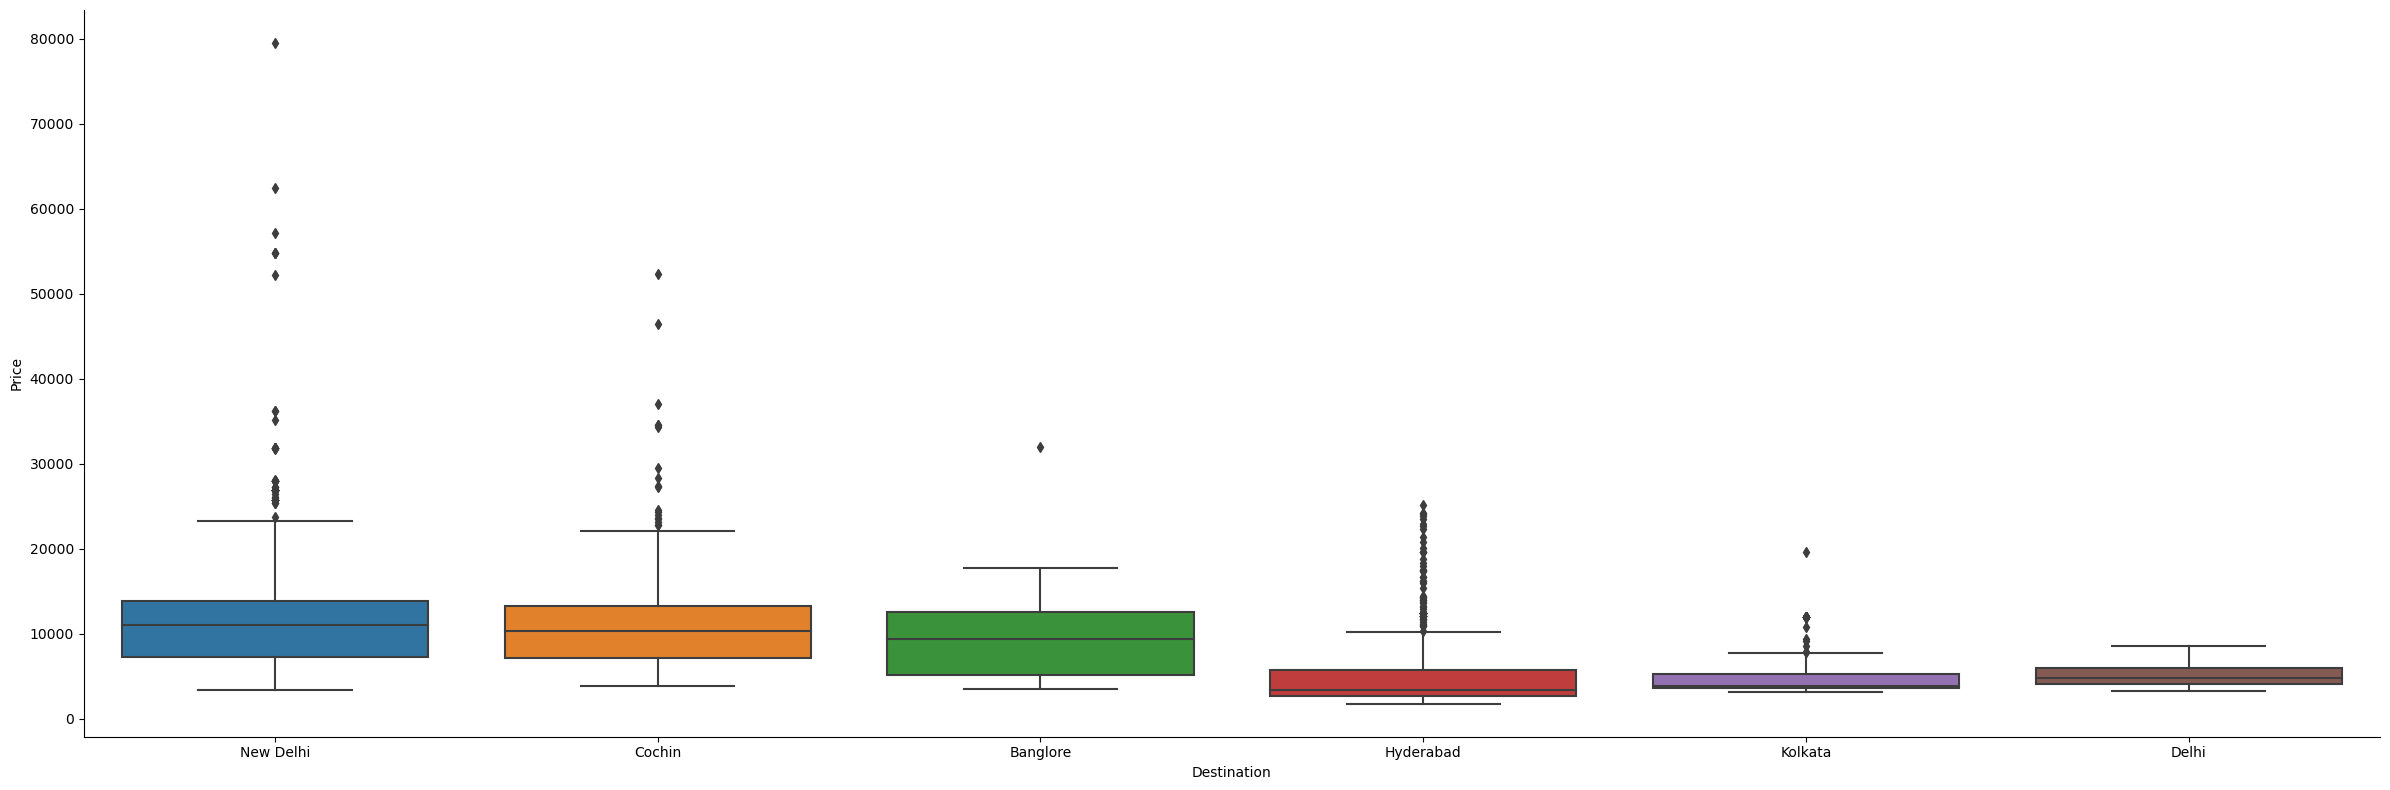

In [24]:
sns.catplot(y="Price",x="Destination",data=data.sort_values("Price",ascending=False),kind="box",height=8,aspect=3)
plt.show()

Observation: Here we are Plotting the box with the help of a cat plot between the price of the flight and the destination to which the passesnger is traveling and figured out that New Delhi has the most outliers and kolkatha has the least

### Feature Engineering

#### Let's see our processed data first

In [25]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### First we need to divide the features and labels and converting then hours in minutes.

In [26]:
data.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [27]:
data["Duration"]=data["Duration"].str.replace("h","*60").str.replace(' ',"+").str.replace('m','*1').apply(eval)

####  Date_of_journery : Here we are orgranizing the format of the date of journey in our dataset for better preprocessing in the model stage

In [28]:
data["Date_of_Journey"].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [29]:
data["Jouney_day"]=data["Date_of_Journey"].str.split('/').str[0].astype(int)
data["Jouney_month"]=data["Date_of_Journey"].str.split('/').str[1].astype(int)
data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [30]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Jouney_day',
       'Jouney_month'],
      dtype='object')

#### Dep_Time : Here we are converting departure time into hours and minutes

In [31]:
data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"]=pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"],axis=1,inplace=True)

C:\Users\Niki\AppData\Local\Temp\ipykernel_14112\2281550827.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
C:\Users\Niki\AppData\Local\Temp\ipykernel_14112\2281550827.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_min"]=pd.to_datetime(data["Dep_Time"]).dt.minute


####  Arrival_Time: Similarly we are convering the arrival time into hours and minutes

In [32]:
data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"],axis=1,inplace=True)

C:\Users\Niki\AppData\Local\Temp\ipykernel_14112\842191643.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
C:\Users\Niki\AppData\Local\Temp\ipykernel_14112\842191643.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute


In [33]:
#check the dataframe
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jouney_day,Jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


#### Plot the chart for months(Duration ) vs Number of flights

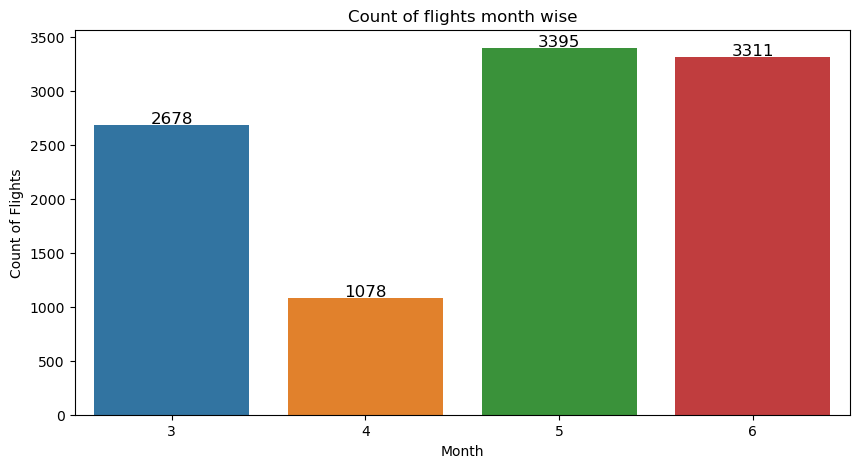

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="Jouney_month")
plt.title("Count of flights month wise")
plt.xlabel("Month")
plt.ylabel("Count of Flights")
for i , count in enumerate(data["Jouney_month"].value_counts().sort_index()):
    plt.text( i, count+20,str(count),ha="center",fontsize=12)

plt.show()

In [35]:
data["Jouney_month"].unique()

array([3, 5, 6, 4])

#### Plot the graph Types of Airlines  vs Number  of Flights

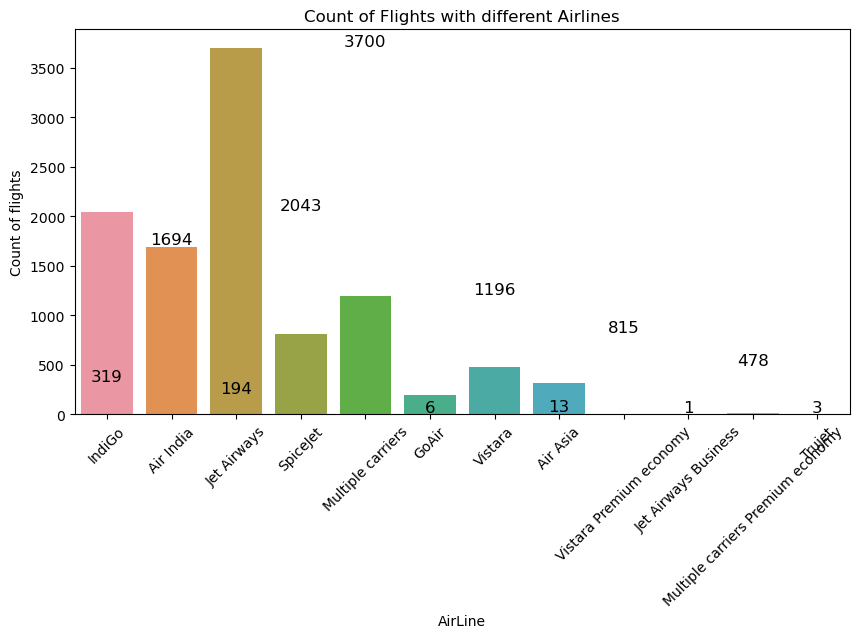

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="Airline")
plt.title("Count of Flights with different Airlines")
plt.xlabel("AirLine")
plt.ylabel("Count of flights")
plt.xticks(rotation=45)
for  i ,count in enumerate(data["Airline"].value_counts().sort_index()):
    plt.text(i,count+20,str(count),ha="center",fontsize=12)

plt.show()

Observation: 
* Now  from the above  grpah we can see that between the type of Airline and Count of Flights we can see jet Airway has the most flight board

#### Plotting the Ticket_Prices vs Airlines

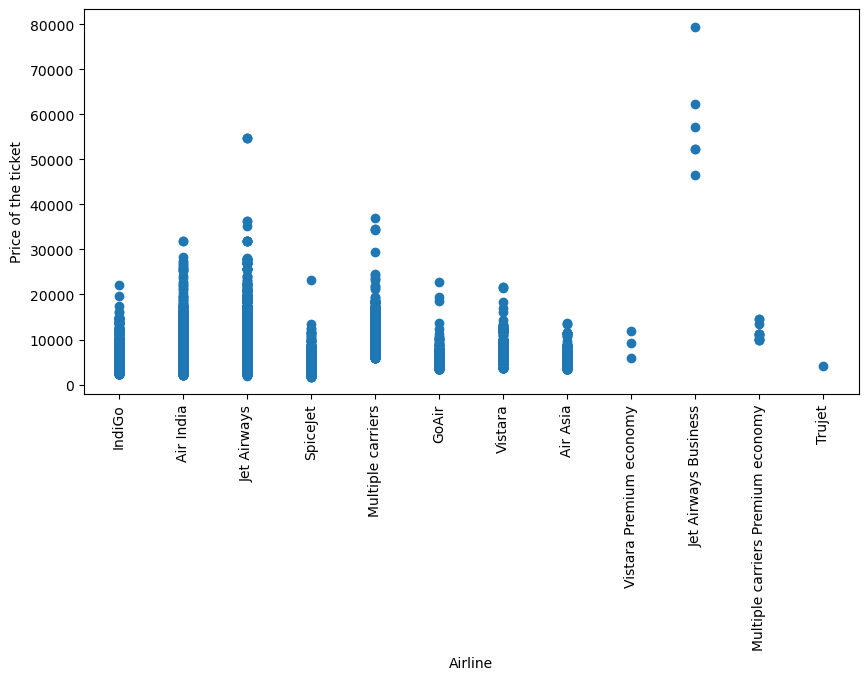

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(data["Airline"],data["Price"])
plt.xlabel("Airline")
plt.ylabel("Price of the ticket")
plt.xticks(rotation=90)
plt.show()

#### Correlation between all the Features

In [38]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Jouney_day', 'Jouney_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

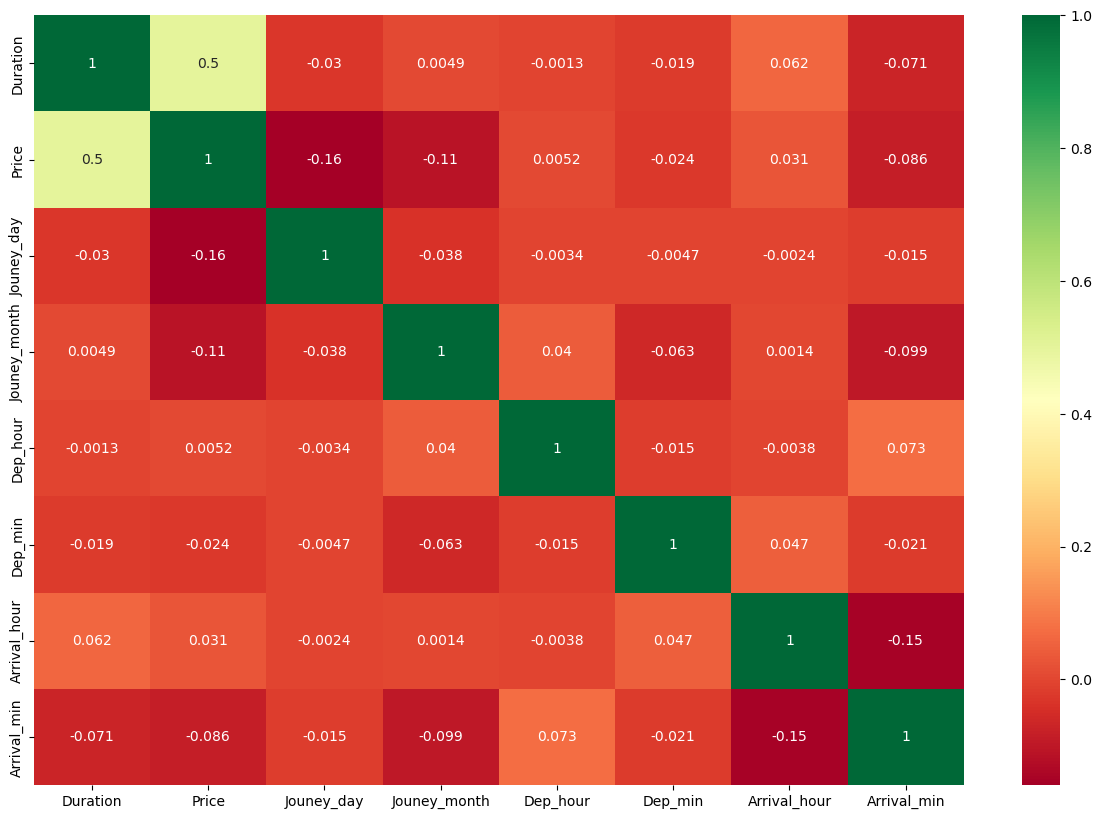

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(data[["Duration","Price","Jouney_day","Jouney_month","Dep_hour","Dep_min","Arrival_hour","Arrival_min"]].corr(),annot=True,cmap="RdYlGn")
plt.show()

#### Dealing with categorical  and Numerical values

In [40]:
data_categorical_cols=data.select_dtypes(exclude=["int64","float","int32"])
data_numerical_cols=data.select_dtypes(include=["int64","float","int32"])



In [41]:
data_categorical_cols.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [42]:
data_numerical_cols.head()

,Duration,Price,Jouney_day,Jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,3897,24,3,22,20,1,10
1,445,7662,1,5,5,50,13,15
2,1140,13882,9,6,9,25,4,25
3,325,6218,12,5,18,5,23,30
4,285,13302,1,3,16,50,21,35


#### Label encode the categorical Columns



In [43]:
le=LabelEncoder()
data_categorical_cols=data_categorical_cols.apply(le.fit_transform)

In [44]:
data_categorical_cols.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


#### Let's concate the categorical  n Numerical cols

In [45]:
data=pd.concat([data_categorical_cols,data_numerical_cols],axis=1)

In [46]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Price,Jouney_day,Jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,3897,24,3,22,20,1,10
1,1,3,0,84,1,8,445,7662,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,13882,9,6,9,25,4,25
3,3,3,0,91,0,8,325,6218,12,5,18,5,23,30
4,3,0,5,29,0,8,285,13302,1,3,16,50,21,35


####  Create the columns into   x and y

In [47]:
x=data.drop(["Price"],axis=1)
y=data.Price

In [48]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Jouney_day,Jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [49]:
x.shape

(10462, 13)

In [50]:
y.shape

(10462,)

In [51]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

#### Split the data into the train and test

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7323, 13)
(3139, 13)
(7323,)
(3139,)


### data scaling

In [54]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [55]:
x_train.shape

(7323, 13)

In [56]:
x_test.shape

(3139, 13)

### Model building

#### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
#create the model
linear=LinearRegression().fit(x_train,y_train)

In [59]:
#coefficients of Linear model
linear.coef_

array([  142.100079  ,  -284.78729109,   368.63163405,  -198.68809644,
       -2230.11016804,   231.68322273,  1195.72256747,  -628.75206884,
        -368.41777433,   204.33186168,   -81.4044401 ,  -116.76023335,
         -15.65317737])

In [60]:
#intercept of the linear model
linear.intercept_

9053.232145295644

#### Evalation  on the train data on linear Regression


In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
linear_pred_train = linear.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(linear_pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(linear_pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(linear_pred_train,y_train)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,linear_pred_train)
print("R-squared on Train Data " , r2_sk)

N=x_train.shape[0]
p=x_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 2528.3077338686458
MSE on Train Data : 12647588.935798004
RMSE on Train Data : 3556.3448842594
R-squared on Train Data  0.4158163098863762
AdjustedR- squared on Train Data  0.41477726378273994


#### Evalation of the test data Linear Regression

In [63]:
linear_pred_test = linear.predict(x_test)
print('MAE on test Data :', mean_absolute_error(linear_pred_test,y_test))
print('MSE on test Data :', mean_squared_error(linear_pred_test,y_test))
print('RMSE on test Data :', np.sqrt(mean_squared_error(linear_pred_test,y_test)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_test,linear_pred_test)
print("R-squared on test Data " , r2_sk)

N=x_test.shape[0]
p=x_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on test Data " , adj_rsquared)

MAE on test Data : 2488.31839131328
MSE on test Data : 11954097.090552624
RMSE on test Data : 3457.4697526591067
R-squared on test Data  0.42441460146609555
AdjustedR- squared on test Data  0.4220201662081945


### Ridge Regression

In [64]:
ridge=Ridge().fit(x_train,y_train)

#### Evaluation of Train data on Linear Regression

In [65]:
ridge_pred_train = ridge.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(ridge_pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(ridge_pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(ridge_pred_train,y_train)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,ridge_pred_train)
print("R-squared on Train Data " , r2_sk)

N=x_train.shape[0]
p=x_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 2528.292890952359
MSE on Train Data : 12647589.094614577
RMSE on Train Data : 3556.344906588023
R-squared on Train Data  0.41581630255074475
AdjustedR- squared on Train Data  0.41477725643406116


#### Evaluation on the test data of Ridge model

In [66]:
ridge_pred_test = ridge.predict(x_test)
print('MAE on test Data :', mean_absolute_error(ridge_pred_test,y_test))
print('MSE on test Data :', mean_squared_error(ridge_pred_test,y_test))
print('RMSE on test Data :', np.sqrt(mean_squared_error(ridge_pred_test,y_test)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_test,ridge_pred_test)
print("R-squared on test Data " , r2_sk)

N=x_test.shape[0]
p=x_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on test Data " , adj_rsquared)

MAE on test Data : 2488.3005713382922
MSE on test Data : 11954014.723890044
RMSE on test Data : 3457.4578412310457
R-squared on test Data  0.42441856739074446
AdjustedR- squared on test Data  0.42202414863108995


#### Ridge Regression using the Grid Search CV

In [67]:
params={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge1=GridSearchCV(Ridge(),params,cv=5,scoring="neg_mean_absolute_error",n_jobs=-1)
ridge1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

#### Evaluation on the train data on Grid seacrh CV

In [68]:
#Evaluation on the train data

ridge1_pred_train = ridge1.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(ridge1_pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(ridge1_pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(ridge1_pred_train,y_train)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,ridge1_pred_train)
print("R-squared on Train Data " , r2_sk)

N=x_train.shape[0]
p=x_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 2527.172312704966
MSE on Train Data : 12649105.022190914
RMSE on Train Data : 3556.5580302015196
R-squared on Train Data  0.41574628286794313
AdjustedR- squared on Train Data  0.414707112212215


#### Evaluation on the test on Grid search Ridge

In [69]:
ridge1_pred_test = ridge1.predict(x_test)
print('MAE on test Data :', mean_absolute_error(ridge1_pred_test,y_test))
print('MSE on test Data :', mean_squared_error(ridge1_pred_test,y_test))
print('RMSE on test Data :', np.sqrt(mean_squared_error(ridge1_pred_test,y_test)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_test,ridge1_pred_test)
print("R-squared on test Data " , r2_sk)

N=x_test.shape[0]
p=x_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on test Data " , adj_rsquared)

MAE on test Data : 2486.8954527909186
MSE on test Data : 11947634.102798363
RMSE on test Data : 3456.5349850389716
R-squared on test Data  0.4247257919603735
AdjustedR- squared on test Data  0.4223326512549287


### Lasso Regression

In [70]:
lasso=Lasso().fit(x_train,y_train)

####  Evaluation on the train on Lasso Regression

In [71]:
lasso_pred_train = lasso.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(lasso_pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(lasso_pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(lasso_pred_train,y_train)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,lasso_pred_train)
print("R-squared on Train Data " , r2_sk)

N=x_train.shape[0]
p=x_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 2528.0614991873254
MSE on Train Data : 12647603.433653278
RMSE on Train Data : 3556.346922567212
R-squared on Train Data  0.4158156402401191
AdjustedR- squared on Train Data  0.41477659294543057


#### evaluation on the test data on Lasso regression

In [72]:
lasso_pred_test = lasso.predict(x_test)
print('MAE on test Data :', mean_absolute_error(lasso_pred_test,y_test))
print('MSE on test Data :', mean_squared_error(lasso_pred_test,y_test))
print('RMSE on test Data :', np.sqrt(mean_squared_error(lasso_pred_test,y_test)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_test,lasso_pred_test)
print("R-squared on test Data " , r2_sk)

N=x_test.shape[0]
p=x_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on test Data " , adj_rsquared)

MAE on test Data : 2488.0400434332337
MSE on test Data : 11953402.782340558
RMSE on test Data : 3457.3693442183117
R-squared on test Data  0.4244480321523214
AdjustedR- squared on test Data  0.4220537359660751


### Decsion Tree Regressor

In [73]:
#performing the Decision Tree Regression

In [74]:
depth=list(range(3,30))
param_grid=dict(max_depth=depth)
tree=GridSearchCV(DecisionTreeRegressor(),param_grid,cv=10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

#### Evaluation on the train results


In [75]:
tree_pred_train = tree.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(tree_pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(tree_pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(tree_pred_train,y_train)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,tree_pred_train)
print("R-squared on Train Data " , r2_sk)

N=x_train.shape[0]
p=x_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 39.77026612231338
MSE on Train Data : 73009.73446422738
RMSE on Train Data : 270.20313555587654
R-squared on Train Data  0.9966277291023582
AdjustedR- squared on Train Data  0.9966217310832489


#### Evaluation on the test data


In [76]:
tree_pred_test = tree.predict(x_test)
print('MAE on test Data :', mean_absolute_error(tree_pred_test,y_test))
print('MSE on test Data :', mean_squared_error(tree_pred_test,y_test))
print('RMSE on test Data :', np.sqrt(mean_squared_error(tree_pred_test,y_test)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_test,tree_pred_test)
print("R-squared on test Data " , r2_sk)

N=x_test.shape[0]
p=x_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on test Data " , adj_rsquared)

MAE on test Data : 763.7060748198946
MSE on test Data : 3721457.2262300476
RMSE on test Data : 1929.1078835124922
R-squared on test Data  0.8208131969766796
AdjustedR- squared on test Data  0.8200677798761027


In [77]:
linear_score=round(linear.score(x_train,y_train)*100,2)
linear_score_test=round(linear.score(x_test,y_test)*100,2)

In [78]:
ridge_score=round(ridge1.score(x_train,y_train)*100,2)
ridge_score_test=round(ridge1.score(x_test,y_test)*100,2)

In [79]:
lasso_score=round(lasso.score(x_train,y_train)*100,2)
lasso_score_test=round(lasso.score(x_test,y_test)*100,2)

In [80]:
decision_score=round(tree.score(x_train,y_train)*100,2)
decision_score_test=round(tree.score(x_test,y_test)*100,2)

### Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier


In [82]:
rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

#### evaluation on the train data RFC


In [83]:
rf_pred_train = rf.predict(x_train)
print('MAE on Train Data :', mean_absolute_error(rf_pred_train,y_train))
print('MSE on Train Data :', mean_squared_error(rf_pred_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(rf_pred_train,y_train)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_train,rf_pred_train)
print("R-squared on Train Data " , r2_sk)

N=x_train.shape[0]
p=x_train.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on Train Data " , adj_rsquared)

MAE on Train Data : 55.111293185852794
MSE on Train Data : 255149.69657244298
RMSE on Train Data : 505.1234468646679
R-squared on Train Data  0.988214805839145
AdjustedR- squared on Train Data  0.9881938443500096


#### Evaluation on the test data

In [84]:
rf_pred_test = rf.predict(x_test)
print('MAE on test Data :', mean_absolute_error(rf_pred_test,y_test))
print('MSE on test Data :', mean_squared_error(rf_pred_test,y_test))
print('RMSE on test Data :', np.sqrt(mean_squared_error(rf_pred_test,y_test)))

import sklearn.metrics as metrics
r2_sk = metrics.r2_score(y_test,rf_pred_test)
print("R-squared on test Data " , r2_sk)

N=x_test.shape[0]
p=x_test.shape[1]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))

print("AdjustedR- squared on test Data " , adj_rsquared)

MAE on test Data : 863.6610385473081
MSE on test Data : 4785807.027078687
RMSE on test Data : 2187.648743989466
R-squared on test Data  0.7695651437226111
AdjustedR- squared on test Data  0.7686065347204971


In [85]:
RFC_score=rf.score(x_train,y_train)
RFC_score_test=rf.score(x_test,y_test)


### Comparing the models

In [86]:
#comparing all the models
models=pd.DataFrame({
    "Models":["Linear","Ridge Regression","Lasso Regression","Decision_tree_Regressor","Random Forest Classifier"],
    "Score":[linear_score,ridge_score,lasso_score,decision_score,RFC_score],
    "Test Score":[linear_score_test,ridge_score_test,lasso_score_test,decision_score_test,RFC_score_test]
})

In [87]:
models.sort_values(by="Test Score",ascending=False)

,Models,Score,Test Score
3,Decision_tree_Regressor,99.660000,82.080000
0,Linear,41.580000,42.440000
2,Lasso Regression,41.580000,42.440000
4,Random Forest Classifier,0.964632,0.512265
1,Ridge Regression,-252717.230000,-248689.550000


### CNN Regression

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [89]:
#dataset
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Price,Jouney_day,Jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,3897,24,3,22,20,1,10
1,1,3,0,84,1,8,445,7662,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,13882,9,6,9,25,4,25
3,3,3,0,91,0,8,325,6218,12,5,18,5,23,30
4,3,0,5,29,0,8,285,13302,1,3,16,50,21,35


In [90]:
#shape of x_train
x_train.shape

(7323, 13)

In [91]:
#reshape the x_train 
x_train_reshape = x_train.reshape(x_train.shape[0],x_train.shape[1],1,1)

In [92]:
x_train_reshape.shape

(7323, 13, 1, 1)

In [93]:
#split into the  validation and train
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_reshape, y_train, test_size=0.2, random_state=42)

In [94]:
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(x_train_final.shape[1], 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

In [95]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 1, 32)         128       
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 1, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 64)                10304     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

In [96]:
#compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [97]:
#Train the model
model.fit(x_train_final, y_train_final, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20


184/184 [==============================] - 3s 7ms/step - loss: 86341016.0000 - mae: 8057.9565 - val_loss: 49373816.0000 - val_mae: 4991.0884
Epoch 2/20
184/184 [==============================] - 1s 4ms/step - loss: 24600206.0000 - mae: 3963.8035 - val_loss: 29411942.0000 - val_mae: 3917.0435
Epoch 3/20
184/184 [==============================] - 1s 4ms/step - loss: 20943378.0000 - mae: 3679.0508 - val_loss: 27165268.0000 - val_mae: 3691.5215
Epoch 4/20
184/184 [==============================] - 1s 4ms/step - loss: 18608292.0000 - mae: 3424.7676 - val_loss: 25053376.0000 - val_mae: 3467.8198
Epoch 5/20
184/184 [==============================] - 1s 4ms/step - loss: 16639604.0000 - mae: 3195.8850 - val_loss: 23352282.0000 - val_mae: 3302.4495
Epoch 6/20
184/184 [==============================] - 1s 4ms/step - loss: 15214644.0000 - mae: 3012.2068 - val_loss: 22384294.0000 - val_mae: 3127.6511
Epoch 7/20
184/184 [==============================] - 1s 4ms/step - loss: 14207554.000

### Evaluate the model

In [98]:
loss, mae = model.evaluate(x_val, y_val)
print("Validation Loss:", loss)
print("Validation MAE:", mae)

46/46 [==============================] - 0s 3ms/step - loss: 18018134.0000 - mae: 2590.0354
Validation Loss: 18018134.0
Validation MAE: 2590.035400390625
